<a href="https://colab.research.google.com/github/samridhi0302/Neural-Style-Transfer-on-Car-Images_/blob/main/Style_transfer_(VGG19).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import cv2
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import numpy as np
import tensorflow as tf
from imageio import mimsave
from keras import backend as K
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import display, Image, clear_output



In [ ]:
directory = "/content/drive/MyDrive/Style transfer/Car"

files = os.listdir(directory)
for file_name in files:

    old_name = os.path.join(directory, file_name)

    new_name = old_name.replace('.png', '.jpeg')
    os.rename(old_name, new_name)

In [ ]:
dir = "/content/drive/MyDrive/Style transfer/Patterns/img"

files = os.listdir(dir)


for file_name in files:

    old_name = os.path.join(dir, file_name)


    new_name = old_name.replace('.jpg', '.jpeg')
    os.rename(old_name, new_name)

In [ ]:
ROOT_DIR = "/content/drive/MyDrive/Style transfer"
IMAGE_WIDTH = 128
IMAGE_HEIGHT = 128
TOTAL_IMAGES = 1000


In [ ]:
cars = os.listdir(ROOT_DIR+"/Car")

In [ ]:
len(cars)

1995

In [ ]:

from tqdm import tqdm
import cv2
import numpy as np

cars_list = []
for i in tqdm(range(TOTAL_IMAGES)):
    try:
        img = cv2.imread(ROOT_DIR + "/" + cars[i])
        if img is None:
            raise Exception(f"Error reading image: {ROOT_DIR}/{cars[i]}")

        img = cv2.resize(img, (IMAGE_WIDTH, IMAGE_HEIGHT))
        img = img / 255.0  # normalize image
        cars_list.append(img)
    except Exception as e:
        print(str(e))

cars_arr = np.array(cars_list)

 14%|█▎        | 136/1000 [00:00<00:00, 1352.22it/s]

Error reading image: /content/drive/MyDrive/Style transfer/Car (1890).jpeg
Error reading image: /content/drive/MyDrive/Style transfer/Car (1888).jpeg
Error reading image: /content/drive/MyDrive/Style transfer/Car (19).jpeg
Error reading image: /content/drive/MyDrive/Style transfer/Car (187).jpeg
Error reading image: /content/drive/MyDrive/Style transfer/Car (1886).jpeg
Error reading image: /content/drive/MyDrive/Style transfer/Car (1864).jpeg
Error reading image: /content/drive/MyDrive/Style transfer/Car (1869).jpeg
Error reading image: /content/drive/MyDrive/Style transfer/Car (1893).jpeg
Error reading image: /content/drive/MyDrive/Style transfer/Car (1889).jpeg
Error reading image: /content/drive/MyDrive/Style transfer/Car (1898).jpeg
Error reading image: /content/drive/MyDrive/Style transfer/Car (1874).jpeg
Error reading image: /content/drive/MyDrive/Style transfer/Car (1868).jpeg
Error reading image: /content/drive/MyDrive/Style transfer/Car (1860).jpeg
Error reading image: /conten

 47%|████▋     | 468/1000 [00:00<00:00, 1401.48it/s]

Error reading image: /content/drive/MyDrive/Style transfer/Car (389).jpeg
Error reading image: /content/drive/MyDrive/Style transfer/Car (407).jpeg
Error reading image: /content/drive/MyDrive/Style transfer/Car (403).jpeg
Error reading image: /content/drive/MyDrive/Style transfer/Car (406).jpeg
Error reading image: /content/drive/MyDrive/Style transfer/Car (411).jpeg
Error reading image: /content/drive/MyDrive/Style transfer/Car (408).jpeg
Error reading image: /content/drive/MyDrive/Style transfer/Car (39).jpeg
Error reading image: /content/drive/MyDrive/Style transfer/Car (38).jpg
Error reading image: /content/drive/MyDrive/Style transfer/Car (387).jpeg
Error reading image: /content/drive/MyDrive/Style transfer/Car (386).jpeg
Error reading image: /content/drive/MyDrive/Style transfer/Car (409).jpeg
Error reading image: /content/drive/MyDrive/Style transfer/Car (391).jpeg
Error reading image: /content/drive/MyDrive/Style transfer/Car (398).jpeg
Error reading image: /content/drive/MyDri

100%|██████████| 1000/1000 [00:00<00:00, 1663.63it/s]

Error reading image: /content/drive/MyDrive/Style transfer/Car (632).jpeg
Error reading image: /content/drive/MyDrive/Style transfer/Car (615).jpeg
Error reading image: /content/drive/MyDrive/Style transfer/Car (645).jpeg
Error reading image: /content/drive/MyDrive/Style transfer/Car (64).jpeg
Error reading image: /content/drive/MyDrive/Style transfer/Car (636).jpeg
Error reading image: /content/drive/MyDrive/Style transfer/Car (633).jpeg
Error reading image: /content/drive/MyDrive/Style transfer/Car (616).jpeg
Error reading image: /content/drive/MyDrive/Style transfer/Car (61).jpeg
Error reading image: /content/drive/MyDrive/Style transfer/Car (622).jpeg
Error reading image: /content/drive/MyDrive/Style transfer/Car (617).jpeg
Error reading image: /content/drive/MyDrive/Style transfer/Car (626).jpeg
Error reading image: /content/drive/MyDrive/Style transfer/Car (65).jpeg
Error reading image: /content/drive/MyDrive/Style transfer/Car (631).jpeg
Error reading image: /content/drive/MyDri

In [ ]:
patterns = os.listdir(ROOT_DIR+"/Patterns/img")
patterns_list = []
for i in tqdm(range(TOTAL_IMAGES)):
    try:
        img = cv2.imread(ROOT_DIR + "/" + patterns[i])
        if img is None:
            raise Exception(f"Error reading image: {ROOT_DIR}/{patterns[i]}")

        img = cv2.resize(img, (IMAGE_WIDTH, IMAGE_HEIGHT))
        img = img / 255.0  # normalize image
        patterns_list.append(img)
    except Exception as e:
        print(str(e))

patterns_arr = np.array(patterns_list)

 43%|████▎     | 430/1000 [00:00<00:00, 2222.70it/s]

Error reading image: /content/drive/MyDrive/Style transfer/africa21970jpgLargejpg.jpeg
Error reading image: /content/drive/MyDrive/Style transfer/adirondacks1992jpgLargejpg.jpeg
Error reading image: /content/drive/MyDrive/Style transfer/ad050420jpgLargejpg.jpeg
Error reading image: /content/drive/MyDrive/Style transfer/air20011jpgLargejpg.jpeg
Error reading image: /content/drive/MyDrive/Style transfer/agnicolatidodecordura2014jpgLargejpg.jpeg
Error reading image: /content/drive/MyDrive/Style transfer/againstthestampedepngLargepng.jpeg
Error reading image: /content/drive/MyDrive/Style transfer/aejohedordeenergaconsumida2016jpgLargejpg.jpeg
Error reading image: /content/drive/MyDrive/Style transfer/adriaticsa1973jpgLargejpg.jpeg
Error reading image: /content/drive/MyDrive/Style transfer/africa11970jpgLargejpg.jpeg
Error reading image: /content/drive/MyDrive/Style transfer/aegean21967jpgLargejpg.jpeg
Error reading image: /content/drive/MyDrive/Style transfer/admissibleinertia2013jpgLargej

100%|██████████| 1000/1000 [00:00<00:00, 2537.18it/s]

Error reading image: /content/drive/MyDrive/Style transfer/blackonmaroon1jpgLargejpg.jpeg
Error reading image: /content/drive/MyDrive/Style transfer/blockarrangement2012jpgLargejpg.jpeg
Error reading image: /content/drive/MyDrive/Style transfer/blackcrakebirdsofsudanjpgLargejpg.jpeg
Error reading image: /content/drive/MyDrive/Style transfer/blissabyss2015jpgLargejpg.jpeg
Error reading image: /content/drive/MyDrive/Style transfer/blancoazul1969jpgLargejpg.jpeg
Error reading image: /content/drive/MyDrive/Style transfer/blooming1986jpgLargejpg.jpeg
Error reading image: /content/drive/MyDrive/Style transfer/blackdragon1971jpgLargejpg.jpeg
Error reading image: /content/drive/MyDrive/Style transfer/blackfirei1963jpgLargejpg.jpeg
Error reading image: /content/drive/MyDrive/Style transfer/blueformonyellow1962jpgLargejpg.jpeg
Error reading image: /content/drive/MyDrive/Style transfer/blueskypainting1960jpgLargejpg.jpeg
Error reading image: /content/drive/MyDrive/Style transfer/bluenight20162016

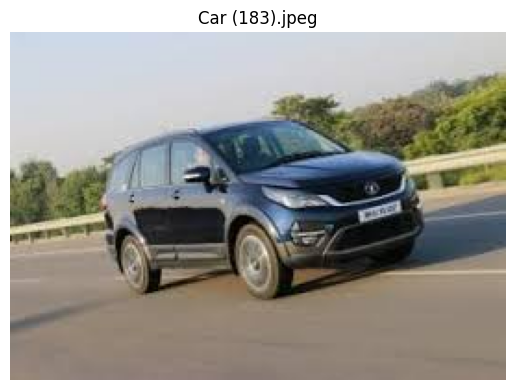

In [ ]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define the image folder path
image_folder_path = "/content/drive/MyDrive/Style transfer/Car"

# Get a list of files in the image folder
image_files = os.listdir(image_folder_path)

# Select a random image from the list
selected_image = random.choice(image_files)

# Construct the full path to the selected image file
img_path = os.path.join(image_folder_path, selected_image)

# Load and display the selected image
try:
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.title(selected_image)  # Set the title of the plot to the selected image filename
    plt.axis('off')  # Hide the axes ticks and labels
    plt.show()
except Exception as e:
    print(f"Error displaying image: {img_path} - {e}")

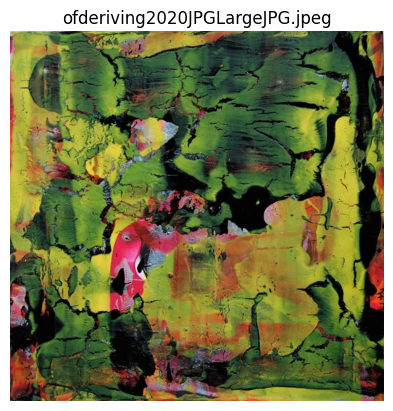

In [ ]:
# Define the image folder path
image_folder_path = "/content/drive/MyDrive/Style transfer/Patterns/img"

# Get a list of files in the image folder
image_files = os.listdir(image_folder_path)

# Select a random image from the list
selected_image = random.choice(image_files)

# Construct the full path to the selected image file
img_path = os.path.join(image_folder_path, selected_image)

# Load and display the selected image
try:
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.title(selected_image)  # Set the title of the plot to the selected image filename
    plt.axis('off')  # Hide the axes ticks and labels
    plt.show()
except Exception as e:
    print(f"Error displaying image: {img_path} - {e}")

In [ ]:
from PIL import Image
import time


In [ ]:
content_path = "/content/drive/MyDrive/Style transfer/Car/Car (1002).jpeg"
style_path = "/content/drive/MyDrive/Style transfer/Patterns/img/0092jpgLargejpg.jpeg"

In [ ]:
def load_file(image_path):
    image =  Image.open(image_path)
    max_dim = 512
    factor = max_dim / max(image.size)
    # Use LANCZOS resampling instead of ANTIALIAS
    image = image.resize((round(image.size[0]*factor), round(image.size[1]*factor)), Image.LANCZOS)
    im_array = np.array(image)
    im_array = np.expand_dims(im_array, axis=0)

    return im_array

In [ ]:
def show_im(img,title=None):
    img=np.squeeze(img,axis=0) #squeeze array to drop batch axis
    plt.imshow(np.uint8(img))
    if title is None:
        pass
    else:
        plt.title(title)
    plt.imshow(np.uint8(img))

In [ ]:
content = load_file(content_path)
style = load_file(style_path)

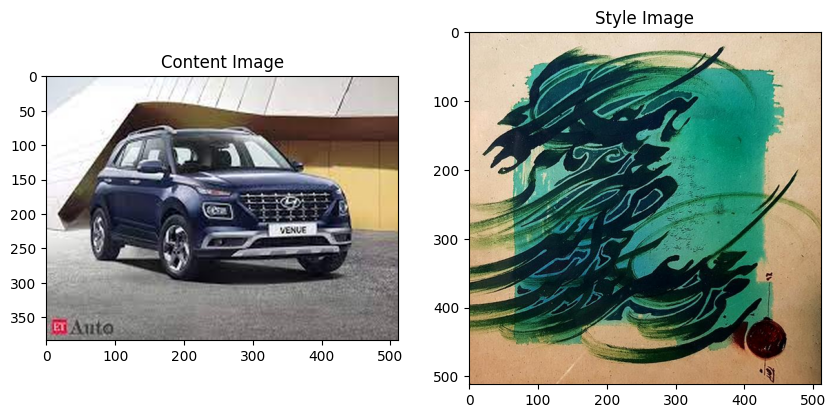

In [ ]:
plt.figure(figsize=(10,10))
content = load_file(content_path)
style = load_file(style_path)
plt.subplot(1,2,1)
show_im(content,'Content Image')
plt.subplot(1,2,2)
show_im(style,'Style Image')
plt.show()

In [ ]:
def img_preprocess(img_path):
    image=load_file(img_path)
    img=tf.keras.applications.vgg19.preprocess_input(image)
    return img

In [ ]:
def deprocess_img(processed_img):
  x = processed_img.copy()
  if len(x.shape) == 4:
    x = np.squeeze(x, 0)
  assert len(x.shape) == 3 #Input dimension must be [1, height, width, channel] or [height, width, channel]


  # perform the inverse of the preprocessing step
  x[:, :, 0] += 103.939
  x[:, :, 1] += 116.779
  x[:, :, 2] += 123.68
  x = x[:, :, ::-1] # converting BGR to RGB channel

  x = np.clip(x, 0, 255).astype('uint8')
  return x

In [ ]:
im=img_preprocess(content_path)

In [ ]:
content_layers = ['block5_conv2']
style_layers = ['block1_conv1',
                'block2_conv1',
                'block3_conv1',
                'block4_conv1',
                'block5_conv1']
number_content=len(content_layers)
number_style =len(style_layers)

In [ ]:
def get_model():

    vgg = tf.keras.applications.vgg19.VGG19(include_top=False, weights='imagenet')
    vgg.trainable = False
    content_output = [vgg.get_layer(layer).output for layer in content_layers]
    style_output = [vgg.get_layer(layer).output for layer in style_layers]
    model_output = style_output + content_output
    return tf.keras.models.Model(vgg.input, model_output)

In [ ]:
model=tf.keras.applications.vgg19.VGG19(include_top=False,weights='imagenet')
model.summary()

80134624/80134624 [==============================] - 1s 0us/step
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                              

In [ ]:
model=get_model()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [ ]:
def gram_matrix(tensor):
    channels=int(tensor.shape[-1])
    vector=tf.reshape(tensor,[-1,channels])
    n=tf.shape(vector)[0]
    gram_matrix=tf.matmul(vector,vector,transpose_a=True)
    return gram_matrix/tf.cast(n,tf.float32)

In [ ]:
def get_style_loss(noise,target):
    gram_noise=gram_matrix(noise)
    #gram_target=gram_matrix(target)
    loss=tf.reduce_mean(tf.square(target-gram_noise))
    return loss

In [ ]:
def get_features(model,content_path,style_path):
    content_img=img_preprocess(content_path)
    style_image=img_preprocess(style_path)

    content_output=model(content_img)
    style_output=model(style_image)

    content_feature = [layer[0] for layer in content_output[number_style:]]
    style_feature = [layer[0] for layer in style_output[:number_style]]
    return content_feature,style_feature

In [ ]:
def get_content_loss(content_feature, target_content_feature):
    # Calculate the mean squared error (L2 loss) between content_feature and target_content_feature
    content_loss = tf.reduce_mean(tf.square(content_feature - target_content_feature))
    return content_loss

In [ ]:
def compute_loss(model, loss_weights,image, gram_style_features, content_features):
    style_weight,content_weight = loss_weights #style weight and content weight are user given parameters
                                               #that define what percentage of content and/or style will be preserved in the generated image

    output=model(image)
    content_loss=0
    style_loss=0

    noise_style_features = output[:number_style]
    noise_content_feature = output[number_style:]

    weight_per_layer = 1.0/float(number_style)
    for a,b in zip(gram_style_features,noise_style_features):
        style_loss+=weight_per_layer*get_style_loss(b[0],a)


    weight_per_layer =1.0/ float(number_content)
    for a,b in zip(noise_content_feature,content_features):
        content_loss+=weight_per_layer*get_content_loss(a[0],b)

    style_loss *= style_weight
    content_loss *= content_weight

    total_loss = content_loss + style_loss


    return total_loss,style_loss,content_loss

In [ ]:
def compute_grads(dictionary):
    with tf.GradientTape() as tape:
        all_loss=compute_loss(**dictionary)

    total_loss=all_loss[0]
    return tape.gradient(total_loss,dictionary['image']),all_loss

In [ ]:
model=tf.keras.applications.vgg19.VGG19(include_top=False,weights='imagenet')

In [ ]:
model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [ ]:
def run_style_transfer(content_path,style_path,epochs=500,content_weight=1e3, style_weight=1e-2):


    model=get_model()

    for layer in model.layers:
        layer.trainable = False

    content_feature,style_feature = get_features(model,content_path,style_path)
    style_gram_matrix=[gram_matrix(feature) for feature in style_feature]

    noise = img_preprocess(content_path)
    noise=tf.Variable(noise,dtype=tf.float32)

    optimizer = tf.keras.optimizers.Adam(learning_rate=5, beta_1=0.99, epsilon=1e-1)

    best_loss,best_img=float('inf'),None

    loss_weights = (style_weight, content_weight)
    dictionary={'model':model,
              'loss_weights':loss_weights,
              'image':noise,
              'gram_style_features':style_gram_matrix,
              'content_features':content_feature}

    norm_means = np.array([103.939, 116.779, 123.68])
    min_vals = -norm_means
    max_vals = 255 - norm_means

    imgs = []
    for i in range(epochs):
        grad,all_loss=compute_grads(dictionary)
        total_loss,style_loss,content_loss=all_loss
        optimizer.apply_gradients([(grad,noise)])
        clipped=tf.clip_by_value(noise,min_vals,max_vals)
        noise.assign(clipped)

        if total_loss<best_loss:
            best_loss = total_loss
            best_img = deprocess_img(noise.numpy())

         #for visualization

        if i % 5 == 0:
            plot_img = noise.numpy()
            plot_img = deprocess_img(plot_img)
            imgs.append(plot_img)
            clear_output(wait=True)
            display(Image.fromarray(plot_img))
            print('Epoch: {}'.format(i))
            print('Total loss: {:.4e}, '
                  'style loss: {:.4e}, '
                  'content loss: {:.4e}, '.format(total_loss, style_loss, content_loss))

    clear_output(wait=True)


    return best_img,best_loss,imgs

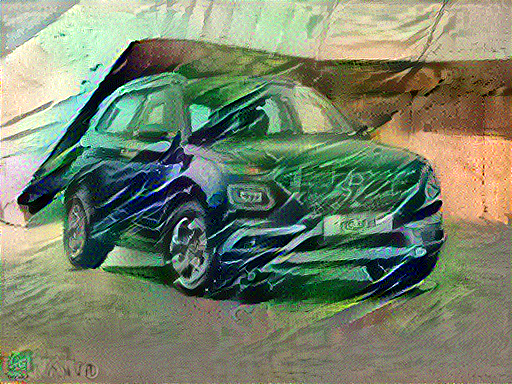

Epoch: 495
Total loss: 1.1385e+06, style loss: 4.6300e+05, content loss: 6.7547e+05, 


In [ ]:
best, best_loss,image = run_style_transfer(content_path,
                                     style_path, epochs=500)

In [ ]:
os.makedirs("/content/drive/MyDrive/Stylized")

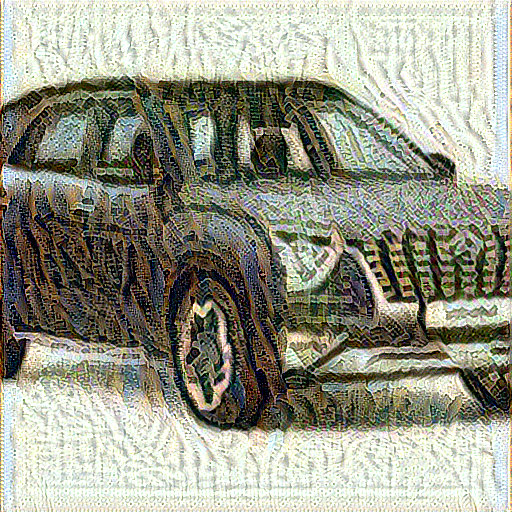

Epoch: 45
Total loss: 4.3681e+07, style loss: 4.1176e+07, content loss: 2.5052e+06, 


In [ ]:


# Function to get a list of file paths for all content images in the dataset directory
def get_content_image_paths(dataset_directory):
    content_image_paths = []
    for root, _, files in os.walk(dataset_directory):
        for file in files:
            if file.lower().endswith(('.jpg', '.jpeg', '.png')):
                content_image_paths.append(os.path.join(root, file))
    return content_image_paths

# Define the paths to content and style images directories
content_dataset_directory = "/content/drive/MyDrive/Style transfer/Car_Testing"
style_image_path = "/content/drive/MyDrive/Style transfer/Patterns/img/046jpgLargejpg.jpeg"

# Get the list of content image file paths
content_image_paths = get_content_image_paths(content_dataset_directory)

# Loop through each content image and perform style transfer
for content_path in content_image_paths:
    # Run style transfer for each content image
    best, best_loss, _ = run_style_transfer(content_path, style_image_path, epochs=50)

    # Convert the NumPy array back to a PIL Image
    best_pil_image = Image.fromarray(np.uint8(best))

    # Save the stylized image to the output directory
    output_directory = "/content/drive/MyDrive/Stylized"
    content_filename = os.path.basename(content_path)
    output_filename = f"stylized_{content_filename}"
    output_filepath = os.path.join(output_directory, output_filename)
    best_pil_image.save(output_filepath)  # Save the PIL image to the output directory




